## THE SPARKS FOUNDATION (GRIP) INTERNSHIP PROJECT


## THE AIM OF THIS PROJECT TO PREDICT THE OPTIMUM NUMBER OF CLUSTERS FOR K MEANS

In [53]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans

In [54]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [55]:
df.shape

(150, 6)

## EXPLORATORY DATA ANALYSIS

In [56]:
    df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [57]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

## PLOTTING 

<Figure size 288x360 with 0 Axes>

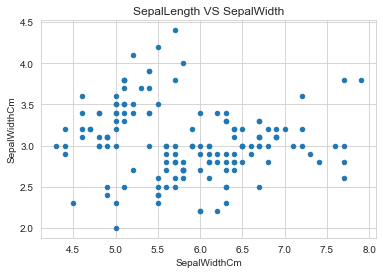

In [58]:
plt.figure(figsize=(4,5))
df.plot(kind='scatter', x ='SepalLengthCm', y = 'SepalWidthCm')
plt.title('SepalLength VS SepalWidth')
plt.xlabel('SepalLengthCm')
plt.xlabel('SepalWidthCm')
plt.show()

<Figure size 288x360 with 0 Axes>

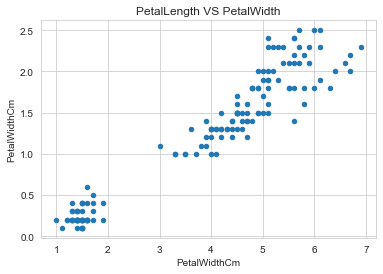

In [59]:
plt.figure(figsize=(4,5))
df.plot(kind='scatter', x ='PetalLengthCm', y = 'PetalWidthCm')
plt.title('PetalLength VS PetalWidth')
plt.xlabel('PetalLengthCm')
plt.xlabel('PetalWidthCm')
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


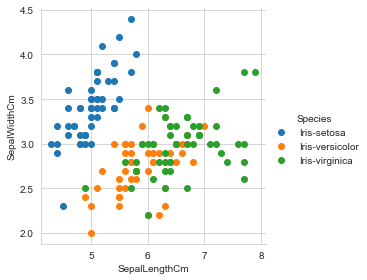

In [60]:
## 2d scatter plot with color coding for each flower type class
sns.set_style('whitegrid')
sns.FacetGrid(df ,hue='Species', size = 4).map(plt.scatter,'SepalLengthCm',  'SepalWidthCm').add_legend()
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


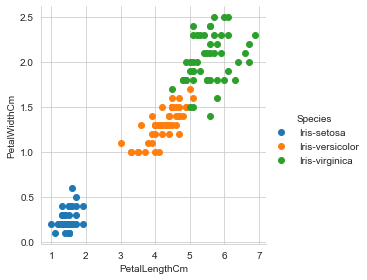

In [61]:
## 2d scatter plot with color coding for each flower type class
sns.set_style('whitegrid')
sns.FacetGrid(df ,hue='Species', size = 4).map(plt.scatter,'PetalLengthCm',  'PetalWidthCm').add_legend()
plt.show()

## LETS FIND OPTIMUM NUMBERS OF CLUSTERS

In [62]:
X = df.iloc[:,[1,2,3,4]].values
clusters_sumofsq = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++',
                   max_iter= 300,n_init=10,random_state=10)
    kmeans.fit(X)
    clusters_sumofsq.append(kmeans.inertia_)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


## PLOTTING RESULT ONTO LINE GRAPH

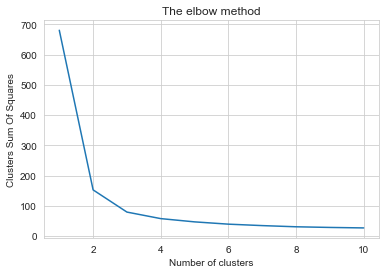

In [48]:
plt.plot(range(1,11),clusters_sumofsq)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Clusters Sum Of Squares') # Within cluster sum of squares
plt.show()


## Creating the kmeans classifier

In [51]:
kmeans = KMeans(n_clusters=i, init = 'k-means++',
                   max_iter= 300,n_init=10,random_state=10)
y_means = kmeans.fit_predict(X)


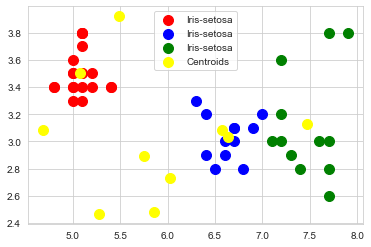

In [52]:
plt.scatter(X[y_means == 0,0],X[y_means == 0,1], 
           s = 100, c ='red',label = 'Iris-setosa')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1], 
           s = 100, c ='blue',label = 'Iris-setosa')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1], 
           s = 100, c ='green',label = 'Iris-setosa')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.legend()